# SHAP Values

Veremos brevemente un modelo de interpretabilidad para modelos complejos de machine learning como es un LGBM.

El uso de **python** para esta exploración se debe a la madurez encontrada en las librerías en mi búsqueda.

Empezamos con la carga de los módulos necesarios:

In [1]:
import pandas as pd
import numpy as np

import lightgbm as lgb

### Plot de evolucion de clientes que se bajan

In [30]:
# Importo dataset total

df = pd.read_csv("D:\OneDrive\Personal\Maestria Data Mining\economia_finanzas\datasets\competencia3_2022.csv.gz")



KeyboardInterrupt: 

In [31]:
df = df.copy()

In [83]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')


#Imprimo columnas
print(df.columns)

#Veo cuantos meses hay
print_full(value_counts(df['foto_mes']))

df_bajas = df.groupby(['foto_mes','clase_ternaria'])['clase_ternaria'].count()



Index(['numero_de_cliente', 'foto_mes', 'active_quarter', 'cliente_vip',
       'internet', 'cliente_edad', 'cliente_antiguedad', 'mrentabilidad',
       'mrentabilidad_annual', 'mcomisiones',
       ...
       'Visa_fultimo_cierre', 'Visa_mpagado', 'Visa_mpagospesos',
       'Visa_mpagosdolares', 'Visa_fechaalta', 'Visa_mconsumototal',
       'Visa_cconsumos', 'Visa_cadelantosefectivo', 'Visa_mpagominimo',
       'clase_ternaria'],
      dtype='object', length=155)
202107    164348
202106    164114
202105    163768
202104    163284
202103    162900
202102    161919
202101    161342
202012    160834
202011    160072
202010    158941
202009    157519
202008    156234
202007    154772
202006    152712
202005    150267
202004    148831
202003    148313
202002    146184
202001    142929
201912    139555
201911    137523
201910    135633
201909    133419
201908    131775
201907    129853
201906    128370
201905    126763
201904    126116
201903    125622
201902    125020
201901    123916
Na

In [84]:
df_bajas = df_bajas.unstack()

#Dropeo hasta el mes de análisis 
df_bajas.drop([202102,202103,202104,202105,202106],axis=0,inplace=True)

In [85]:
df_bajas

clase_ternaria,BAJA+1,BAJA+2,CONTINUA
foto_mes,,,
201901,647.0,697.0,122572.0
201902,700.0,696.0,123624.0
201903,700.0,774.0,124148.0
201904,776.0,575.0,124765.0
201905,576.0,658.0,125529.0
201906,665.0,589.0,127116.0
201907,595.0,656.0,128602.0
201908,659.0,543.0,130573.0
201909,548.0,615.0,132256.0


In [88]:
df_bajas['porcentaje_bajas'] = round(df_bajas['BAJA+2']/(df_bajas['BAJA+2']+df_bajas['BAJA+1']+df_bajas['CONTINUA'])*100,2)
df_bajas.index = pd.to_datetime(df_bajas.index,format='%Y%m')

In [131]:

import plotly.express as px
#Graficos de interes

fig = px.line(df_bajas,y="porcentaje_bajas",text ="porcentaje_bajas")
fig.update_traces(textposition="bottom right")
fig.update_layout(yaxis_range=[0,1])
fig.update_layout(title= ' Porcentaje de bajas a lo largo de 2019 y 2020')

fig.write_html(r'D:\OneDrive\Personal\Maestria Data Mining\economia_finanzas\labo\src\clustering\Evolución de clientes que abandonan.html')


#df_bajas['porcentaje_bajas'].plot()

Cargamos con **pandas** lentamente el dataset. Sólo vamos a trabajar con el primer conjunto de datos que es el más pequeño. Con un poco más de paciencia podrá usar los conjuntos más pesados. 

In [92]:
df_train = pd.read_csv("D:\OneDrive\Personal\Maestria Data Mining\economia_finanzas\datasets\competencia1_2022.csv")

Xtrain = df_train[df_train["foto_mes"] == 202101]
ytrain = Xtrain["clase_ternaria"].map(lambda x: 0 if x == "CONTINUA" else 1)

C:\Users\agust\AppData\Local\Temp\ipykernel_27996\937506877.py:1: DtypeWarning:

Columns (154) have mixed types. Specify dtype option on import or set low_memory=False.



In [93]:
#Exploración de meses disponibles

from pandas import value_counts


print(value_counts(df_train['foto_mes']))

202103    162900
202101    161342
Name: foto_mes, dtype: int64


In [94]:
Xtrain

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
0,31115668,202101,1,0,0,56,132,1897.12,24324.75,940.32,...,4.0,0.0,-16247.77,0.00,3997.0,18435.59,1.0,0.0,1337.22,CONTINUA
1,31115678,202101,1,0,0,48,100,-384.72,33860.45,-515.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONTINUA
2,31117415,202101,1,0,0,60,53,-3622.66,-21310.32,2442.04,...,4.0,0.0,-33430.50,0.00,1573.0,12033.40,4.0,0.0,20011.38,CONTINUA
3,31117711,202101,1,0,0,46,273,14542.05,125727.99,1037.77,...,4.0,0.0,-9832.94,14.27,2063.0,758.21,3.0,0.0,1302.03,CONTINUA
4,31118145,202101,1,0,0,47,192,1868.27,37305.29,1496.68,...,4.0,0.0,0.00,0.00,5842.0,6316.13,1.0,0.0,4680.27,CONTINUA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161337,211517374,202101,0,0,0,40,1,0.00,0.00,0.00,...,4.0,0.0,NaN,NaN,17.0,NaN,NaN,NaN,0.00,CONTINUA
161338,211519298,202101,0,0,0,22,1,0.00,0.00,0.00,...,4.0,0.0,NaN,NaN,6.0,NaN,NaN,NaN,0.00,CONTINUA
161339,211523404,202101,1,0,0,31,1,1.41,1.41,0.00,...,4.0,0.0,NaN,NaN,12.0,NaN,NaN,NaN,0.00,CONTINUA
161340,211528437,202101,0,0,0,22,1,0.00,0.00,0.00,...,NaN,0.0,NaN,NaN,3.0,NaN,NaN,NaN,0.00,CONTINUA


Separamos también todos los casos de **BAJAS+1** y **BAJAS+2**

In [95]:
Xbajas = df_train.query("foto_mes == 202101 and clase_ternaria != 'CONTINUA'")

In [96]:
Xbajas.shape

(1514, 155)

Y nos deshacemos del target y limpiamos un poco la memoria.

In [97]:
Xtrain = Xtrain.drop("clase_ternaria", axis=1)
Xbajas = Xbajas.drop("clase_ternaria", axis=1)

del(df_train)

Hacemos un modelo **LGBM**

In [98]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(Xtrain, ytrain)

# specify your configurations as a dict
params = {
    'objective': 'binary',
    'learning_rate': 0.05,
    'verbose': 2,
    'max_bin': 15,
    'min_data_in_leaf': 4000,
    'verbose': 0,
}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Y miramos su importancia de variables

In [99]:
lgbm_importancia = pd.DataFrame({'Features': gbm.feature_name(),
                        'Importances': gbm.feature_importance()})
lgbm_importancia.sort_values(by='Importances', inplace=True, ascending=False)
lgbm_importancia


,Features,Importances
5,cliente_edad,141
107,ctrx_quarter,126
8,mrentabilidad_annual,119
10,mactivos_margen,103
22,mcuentas_saldo,91
...,...,...
76,cforex_buy,0
75,cforex,0
70,mtarjeta_master_descuentos,0
69,ctarjeta_master_descuentos,0


Ahora avanzamos aplicando un modelo de interpretabilidad sobre el modelo anterior.

In [100]:
import shap

In [101]:
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(Xbajas)

c:\Users\agust\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\explainers\_tree.py:353: UserWarning:

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray



In [102]:
# Veo que son los objetos
len(shap_values)

2

Consolidamos los valores de **SHAP** para cada variable y para cada **BAJA+\***

In [103]:
shap_bajas = pd.DataFrame(shap_values[0], columns = Xbajas.columns)
shap_bajas

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo
0,-0.004904,0.0,0.0,0.0,-0.002334,0.043758,0.013983,-0.041278,0.196130,0.000189,...,0.0,-0.000616,0.011454,-0.014267,-0.002817,-0.021265,0.0,-0.015299,0.0,-0.053038
1,-0.013970,0.0,0.0,0.0,-0.004382,0.048569,0.011794,0.006623,-0.096754,-0.011399,...,0.0,0.001421,-0.057956,-0.006672,0.011768,0.004617,0.0,-0.003721,0.0,-0.060725
2,-0.022926,0.0,0.0,0.0,-0.001292,-0.410950,0.011234,0.023368,0.058636,0.006585,...,0.0,0.001724,-0.030290,0.008067,-0.001562,-0.001833,0.0,-0.007120,0.0,0.016079
3,-0.018709,0.0,0.0,0.0,-0.002978,-0.213675,0.009803,-0.010034,-0.031874,-0.016405,...,0.0,0.001045,-0.000576,-0.014958,-0.003360,-0.063228,0.0,-0.000538,0.0,-0.111314
4,-0.012726,0.0,0.0,0.0,-0.002094,-0.203420,0.014232,-0.044485,0.168928,-0.012609,...,0.0,-0.002317,0.011874,-0.029288,-0.002845,-0.056215,0.0,-0.005447,0.0,-0.099260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,0.022436,0.0,0.0,0.0,-0.001274,0.045961,-0.071549,0.013633,-0.094009,-0.014529,...,0.0,0.001330,0.001324,-0.026429,-0.002340,0.062294,0.0,0.005572,0.0,0.079506
1510,0.014711,0.0,0.0,0.0,-0.002212,0.031978,-0.073241,0.003024,-0.105791,0.000905,...,0.0,0.001267,0.000154,-0.013291,0.011133,0.055093,0.0,0.003651,0.0,-0.071855
1511,0.015259,0.0,0.0,0.0,-0.002597,0.053010,-0.078954,0.022112,-0.120325,-0.005999,...,0.0,0.001442,0.000127,-0.011322,0.013452,0.080696,0.0,-0.000698,0.0,-0.128532
1512,0.005852,0.0,0.0,0.0,-0.003329,-0.179921,-0.070015,-0.004753,-0.104875,-0.015815,...,0.0,0.001135,-0.000063,-0.009317,0.012196,0.086014,0.0,-0.000202,0.0,-0.069681


Y consolidamos sus importancias

In [104]:
shap_importancias = shap_bajas.mean().abs().sort_values(ascending=False)
shap_importancias

ctrx_quarter                     0.966983
cpayroll_trx                     0.611897
mtarjeta_visa_consumo            0.195651
mcuentas_saldo                   0.170158
mpasivos_margen                  0.141330
                                   ...   
cseguro_auto                     0.000000
cseguro_accidentes_personales    0.000000
mpayroll2                        0.000000
mcheques_emitidos_rechazados     0.000000
mforex_buy                       0.000000
Length: 154, dtype: float64

La librería nos da útiles herramientas para vizualizar la info anterior

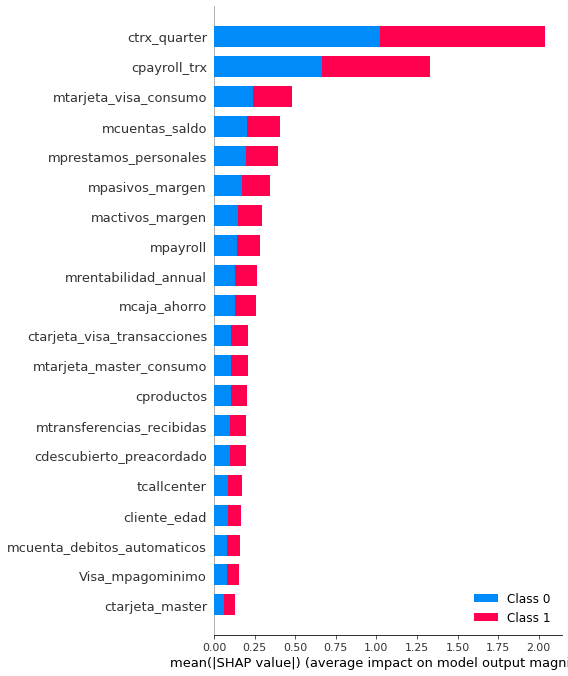

In [105]:
shap.summary_plot(shap_values, Xbajas)


Y ahora debemos empezar a jugar para entender como estan asociadas las variables a los **shap values**

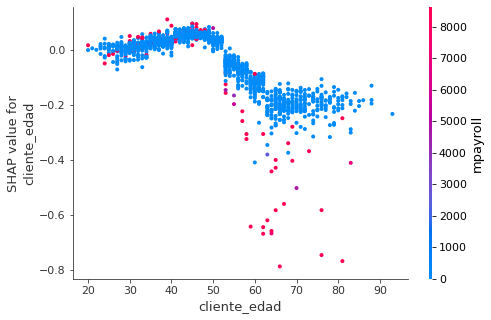

In [106]:
shap.dependence_plot("cliente_edad", shap_values[0], Xbajas)

¿Se podrá hacer una clusterización sobre los valores de shap? 

Como la cantidad de variables es muy alto, es conveniente hacer un embedding con **UMAP**. Como la estrutura de los **shap values** se pueden hacer sin mucho preprocesamiento.

In [21]:
from umap import UMAP
import matplotlib.pyplot as plt


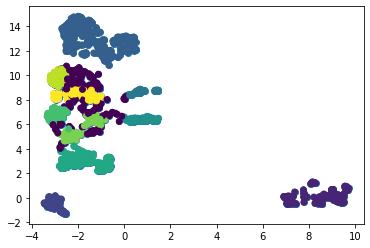

In [125]:
embedding_2d = UMAP(
  n_components=2, n_neighbors=40
).fit_transform(shap_values[0])
plt.scatter(embedding_2d[:,0], embedding_2d[:,1])

import hdbscan
labels = hdbscan.HDBSCAN(
    min_samples=30,
    min_cluster_size=40,
).fit_predict(embedding_2d)

plt.scatter(embedding_2d[:,0], embedding_2d[:,1], c=labels)

Su momento de brillar: Qué se puede hacer desde este punto para tratar de interpretar los distintos segmentos para la presentación de Miranda.

Aplicacion del resumen de valores de variable por cluster para el script de Denicolay

In [155]:
# Importo el dataset

df_mean = pd.read_csv("D:\\OneDrive\\Personal\\Maestria Data Mining\\economia_finanzas\\exp\\CLU1262\\resumen_variables.txt",sep='\t')

In [156]:
df_mean

,cluster2,ctrx_quarter_name,cpayroll_trx_name,mcaja_ahorro_name,mtarjeta_visa_consumo_name,ctarjeta_visa_transacciones_name,mcuentas_saldo_name,mrentabilidad_annual_name,mprestamos_personales_name,mactivos_margen_name,...,cproductos_name,mcomisiones_otras_name,thomebanking_name,mcuenta_debitos_automaticos_name,mcomisiones_name,Visa_cconsumos_name,ccomisiones_otras_name,Master_status_name,mtransferencias_emitidas_name,mpagomiscuentas_name
0,1,30.870205,0.128082,20786.921247,2176.054315,1.071575,36907.991654,13981.868716,6348.930298,115.072017,...,6.733904,941.918226,0.589726,758.812603,941.125113,2.161644,3.633562,0.533904,17582.084342,2261.608705
1,2,3.498580,0.005682,183.089176,0.000000,0.000000,-41859.813111,8170.528892,16346.450966,-180.027784,...,4.866477,123.135142,0.095170,5.683580,123.134645,2.000000,0.690341,0.338068,4.821960,7.191278
2,3,3.558209,0.004478,117.294075,0.000000,0.000000,-3263.078090,4244.016194,1088.482896,75.446269,...,6.359701,355.329209,0.005970,6.233731,355.329209,1.994030,0.761194,0.388060,21.858239,0.525224
3,4,33.539120,0.188264,15057.162311,0.000000,0.000000,28783.662078,29342.983900,28747.709120,1714.798350,...,5.389976,1142.939670,0.541565,549.791284,1143.374548,2.000000,4.364303,0.212714,12582.207445,2110.771015
4,5,44.144836,0.127834,14605.264578,8464.157991,4.182620,41126.804112,12135.439433,3655.623105,-189.035730,...,7.018892,1158.121770,0.688917,850.067928,1157.330372,2.129093,5.944584,0.010076,18744.611681,4405.486921
5,6,89.029727,0.245252,29832.403691,35970.594055,15.525186,76545.675012,17515.271536,7087.964723,-654.227737,...,7.239472,1560.248183,0.804294,2613.299992,1559.193931,9.827415,7.663088,0.014864,38841.597812,6581.382064
6,7,3.901895,0.001115,94.802297,0.000000,0.000000,-14658.323523,14822.946232,5925.762765,691.957815,...,5.544036,1594.007458,0.003344,14.214426,1594.062586,1.997770,2.394649,0.185061,4.576923,0.196154


In [157]:
#Defino que que es cada variable

#ctrx_quarter
#Cantidad de movimientos voluntarios en las cuentas bancarias ( no tarjeta de credito ) que el cliente realizó en los ultimos 90 dias.

#cpayroll_trx
#Cantidad de Acreditaciones de Haberes en relación de depencia que le hicieron al cliente en ese mes.  
# Un cliente puede estar en relacion de dependencia con mas de una empresa. Una empresa puede hacerle VARIOS depósitos al mismo empleado durante el mes.  Soalmente se consideran las acreditaciones de empresas que tienen un contrato con el banco.

#mcaja_ahorro
#Monto total de la caja de ahorro del Paquete Premium

#mtarjeta_visa_consumo
#Monto total de los consumos efectuados durante el mes con la tarjeta de crédito VISA

#ctarjeta_visa_transacciones
#Cantidad de transacciones efectuadas durante el mes con la tarjeta de crédito VISA

#mcuentas_saldo
#Saldo total de TODAS las cuentas del cliente, cajas de ahorro, cuentas corrientes, pesos y dolares. El valor esta convertido a pesos.

#mrentabilidad_annual
#Ganancia total que el banco ha obtenido de ese cliente en el ultimo año de relacion cliente-banco,  o meses desde que ingresó si es cliente reciente.

#mprestamos_personales
#Monto total de la deuda restante de todos los préstamos personales del cliente.

#mcuenta_debitos_automaticos
#Monto total de  débitos automáticos debitados durante el mes en las cuentas  ( no tarjetas de crédito ) . Todo está convertido a pesos argentinos, al valor de la fecha de cierre del utlimo dia habil del mes.

#thomebanking
#{0, 1} indica si el cliente está adherido al Home Banking

#mtransferencias_emitidas
#Monto total de transferencias emitidas en todas las cuentas durante el mes. Puede ser transferencias propias o de terceros.


columnas = ['ctrx_quarter_name','cpayroll_trx_name','mcaja_ahorro_name','mtarjeta_visa_consumo_name','ctarjeta_visa_transacciones_name','mcuentas_saldo_name','mrentabilidad_annual_name','mprestamos_personales_name',
            'mcuenta_debitos_automaticos_name','thomebanking_name','mtransferencias_emitidas_name']

labels = ['Movimientos 90 días','N° Haberes acreditados','Monto caja de ahorro','Consumos tarjeta','N° Transacciones tarjeta','Saldo total','Rentabilidad del banco','Deuda total de préstamos','Débito automatico','Adhesión a Homebanking','Transferencias emitidas']

filas = [1,2,3,4,5,6,7]
labels_filas = ['MODERADO','PASIVO','PASIVO','MODERADO','MODERADO','ACTIVO','PASIVO']

# Reemplazo valor de columasn

dic_columnas = {i:j for i,j in zip(columnas,labels)}
df_mean.rename(columns=dic_columnas, inplace=True)

df_mean.loc[df_mean['cluster2'].isin([1,4,5]), 'Tipo de cliente'] = 'MODERADO'
df_mean.loc[df_mean['cluster2'].isin([2,3,7]), 'Tipo de cliente'] = 'PASIVO'
df_mean.loc[df_mean['cluster2'].isin([6]), 'Tipo de cliente'] = 'ACTIVO'

df_mean['Cantidad_cluster'] = [2920,704,670,818,1588,1211,897]




"""
  cluster2 total_count
     <int>       <int>
1        1        2920
2        2         704
3        3         670
4        4         818
5        5        1588
6        6        1211
7        7         897


"""



'\n  cluster2 total_count\n     <int>       <int>\n1        1        2920\n2        2         704\n3        3         670\n4        4         818\n5        5        1588\n6        6        1211\n7        7         897\n\n\n'

In [154]:
df_mean

,cluster2,Movimientos 90 días,N° Haberes acreditados,Monto caja de ahorro,Consumos tarjeta,N° Transacciones tarjeta,Saldo total,Rentabilidad del banco,Deuda total de préstamos,mactivos_margen_name,...,Adhesión a Homebanking,Débito automatico,mcomisiones_name,Visa_cconsumos_name,ccomisiones_otras_name,Master_status_name,Transferencias emitidas,mpagomiscuentas_name,Tipo de cliente,Cantidad_cluster
0,1,30.870205,0.128082,20786.921247,2176.054315,1.071575,36907.991654,13981.868716,6348.930298,115.072017,...,0.589726,758.812603,941.125113,2.161644,3.633562,0.533904,17582.084342,2261.608705,MODERADO,2920
1,2,3.498580,0.005682,183.089176,0.000000,0.000000,-41859.813111,8170.528892,16346.450966,-180.027784,...,0.095170,5.683580,123.134645,2.000000,0.690341,0.338068,4.821960,7.191278,PASIVO,704
2,3,3.558209,0.004478,117.294075,0.000000,0.000000,-3263.078090,4244.016194,1088.482896,75.446269,...,0.005970,6.233731,355.329209,1.994030,0.761194,0.388060,21.858239,0.525224,PASIVO,670
3,4,33.539120,0.188264,15057.162311,0.000000,0.000000,28783.662078,29342.983900,28747.709120,1714.798350,...,0.541565,549.791284,1143.374548,2.000000,4.364303,0.212714,12582.207445,2110.771015,MODERADO,818
4,5,44.144836,0.127834,14605.264578,8464.157991,4.182620,41126.804112,12135.439433,3655.623105,-189.035730,...,0.688917,850.067928,1157.330372,2.129093,5.944584,0.010076,18744.611681,4405.486921,MODERADO,1588
5,6,89.029727,0.245252,29832.403691,35970.594055,15.525186,76545.675012,17515.271536,7087.964723,-654.227737,...,0.804294,2613.299992,1559.193931,9.827415,7.663088,0.014864,38841.597812,6581.382064,ACTIVO,1211
6,7,3.901895,0.001115,94.802297,0.000000,0.000000,-14658.323523,14822.946232,5925.762765,691.957815,...,0.003344,14.214426,1594.062586,1.997770,2.394649,0.185061,4.576923,0.196154,PASIVO,897


In [160]:
import plotly.express as px

fig = px.bar(df_mean, x="cluster2", y=labels,labels={'cluster2': 'Grupo segmentado de clientes', 'value':'Valor'},hover_data=['Tipo de cliente'], pattern_shape = 'Tipo de cliente')
fig.update_xaxes(categoryorder='array', categoryarray= ['PASIVO','MODERADO','ACTIVO'])
fig.update_layout(title="Valores medios de variables de interés",template='ggplot2')
fig.show()
fig.write_html(r'D:\OneDrive\Personal\Maestria Data Mining\economia_finanzas\labo\src\clustering\Variables de interes.html')

In [137]:
df_mean

,cluster2,Movimientos 90 días,N° Haberes acreditados,Monto caja de ahorro,Consumos tarjeta,N° Transacciones tarjeta,Saldo total,Rentabilidad del banco,Deuda total de préstamos,mactivos_margen_name,...,cproductos_name,mcomisiones_otras_name,Adhesión a Homebanking,Débito automatico,mcomisiones_name,Visa_cconsumos_name,ccomisiones_otras_name,Master_status_name,Transferencias emitidas,mpagomiscuentas_name
0,MODERADO,30.870205,0.128082,20786.921247,2176.054315,1.071575,36907.991654,13981.868716,6348.930298,115.072017,...,6.733904,941.918226,0.589726,758.812603,941.125113,2.161644,3.633562,0.533904,17582.084342,2261.608705
1,2,3.498580,0.005682,183.089176,0.000000,0.000000,-41859.813111,8170.528892,16346.450966,-180.027784,...,4.866477,123.135142,0.095170,5.683580,123.134645,2.000000,0.690341,0.338068,4.821960,7.191278
2,3,3.558209,0.004478,117.294075,0.000000,0.000000,-3263.078090,4244.016194,1088.482896,75.446269,...,6.359701,355.329209,0.005970,6.233731,355.329209,1.994030,0.761194,0.388060,21.858239,0.525224
3,MODERADO,33.539120,0.188264,15057.162311,0.000000,0.000000,28783.662078,29342.983900,28747.709120,1714.798350,...,5.389976,1142.939670,0.541565,549.791284,1143.374548,2.000000,4.364303,0.212714,12582.207445,2110.771015
4,MODERADO,44.144836,0.127834,14605.264578,8464.157991,4.182620,41126.804112,12135.439433,3655.623105,-189.035730,...,7.018892,1158.121770,0.688917,850.067928,1157.330372,2.129093,5.944584,0.010076,18744.611681,4405.486921
5,6,89.029727,0.245252,29832.403691,35970.594055,15.525186,76545.675012,17515.271536,7087.964723,-654.227737,...,7.239472,1560.248183,0.804294,2613.299992,1559.193931,9.827415,7.663088,0.014864,38841.597812,6581.382064
6,7,3.901895,0.001115,94.802297,0.000000,0.000000,-14658.323523,14822.946232,5925.762765,691.957815,...,5.544036,1594.007458,0.003344,14.214426,1594.062586,1.997770,2.394649,0.185061,4.576923,0.196154
